## <p style="text-align: right;"> Nic Wiggins </p>

# MTH 314 Spring 2019 - Midterm Exam 2

This is an open internet exam.  Feel free to use anything on the internet with one important exception...

- **DO NOT** communicate live with other people during the exam (either verbally or on-line).  The goal here is to find answers to problems as you would in the real world.  

Please use paper provided at the front of the room to show your work.  Add your name to the upper right corner of **each page** and put the problem number on the upper left. 

You will be given **70 minutes** to complete this test.  Use your time wisely. 

**HINTS:**
- Neatness is important.  we will ignore all notes or code we can not read.
- Read the entire exam from beginning to end before starting.  Not all questions are equal in points vs. time, so plan your time accordingly.   
- Skip questions you can not answer. 
- Some of the information provided my be a distraction. Do not assume you need to understand everything written to answer the questions. 
- Spaces for answers are provided. However, do not assume that the answer must be in the same format of the cell provided. Feel free to change the cell formatting (ex. markdown to code) or add additional cells as needed to provide your answer.
- When we say "in your own words", it is still okay to Google the answer as a reminder. However, we would like you to do more than copy and paste. Make your own answer. 
- If you get stuck, try not to leave an blank answer. It is better to include some notes or stub functions, so we have an idea about your thinking process to give you partial credit.   
- When you are done, restart the entire notebook and run from beginning to end and make sure your answers still match what you expect. This will ensure you didn't do anything out of order by mistake. 

### Exam Summary
1. (25 points) Markov Chain -- Voters
1. (25 points) Singular Value Decomposition -- Image Denoising
1. (25 points) Furniture Company Profit
1. (25 points) Quick Questions

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
sym.init_printing(use_unicode=True)

----
# Question 1 - (25 points) Markov Chain -- Voters

Markove chains can be applied to many fields. In this question, we will use this to model the voting behavior. 
Let's say that there are three candidates: the Democratic (D), Republican (R), and Independent (I). 
Assume that the distribution of voters starts with $p=[0.48, 0.51, 0.01]$ at day 1. That is, 40% voters may vote for D, another 40% voters may vote for R, and the left 20% will vote for I. In this case, we assume that every voter will vote for only one candidate. 

Everyday, the distribution will change based on the following rules. 
> 80% of D will remain, 15% will become I, and 5% will become R

> 70% of R will remain, 20% will become D, and 10% will become I

> 50% of I will remain, 25% will become R, and 25% will become D


&#9989; <font color=red>**Question a:**</font> Write down the Markov matrix for this application.

In [2]:
#####Start your code here #####
A = np.matrix([[0.8,0.2,0.25],[0.05,0.7,0.25],[0.15,0.1,0.5]])
#####End of your code here#####
print(A)

[[0.8  0.2  0.25]
 [0.05 0.7  0.25]
 [0.15 0.1  0.5 ]]


&#9989; <font color=red>**Question b:**</font> Write down a function to verify that the matrix $A$ you obtained from the previous question is a Markov matrix.

In [3]:
#####Start your code here #####
def verifyMarkov(A):
    return  np.all(np.isclose(np.ones((A.shape[0],1)),A.T*np.ones((A.shape[0],1))))

verifyMarkov(A)
#####End of your code here#####

True

&#9989; <font color=red>**Question c:**</font> Find a matrix $C$ and a diagonal matrix $D$ such that $C^{-1}AC=D$.

In [4]:
#####Start your code here #####
C,D = sym.Matrix(A).diagonalize()
D
#####End of your code here#####

⎡1.0          0                  0        ⎤
⎢                                         ⎥
⎢ 0   0.388196601125011          0        ⎥
⎢                                         ⎥
⎣ 0           0          0.611803398874989⎦

&#9989; <font color=red>**Question d:**</font> Find the distribution for day 10.

In [5]:
#####Start your code here #####
C*D**10*C.inv()*sym.Matrix([[0.4],[0.4],[0.2]])
#####End of your code here#####

⎡0.525419088867187⎤
⎢                 ⎥
⎢0.264264778259277⎥
⎢                 ⎥
⎣0.210316132873535⎦

&#9989; <font color=red>**Question e:**</font> Find the final distribution (the stationary point).

In [6]:
#####Start your code here #####
vects = sym.Matrix(A).eigenvects()

steadystate = np.matrix(vects[0][2][0])
steadystate = steadystate/steadystate.sum()
sym.Matrix(steadystate)
#####End of your code here#####

⎡0.526315789473684⎤
⎢                 ⎥
⎢0.263157894736842⎥
⎢                 ⎥
⎣0.210526315789474⎦

----
# Question 2 - (25 points) Singular Value Decomposition -- Image Denoising

In this question, we will use SVD to remove the noise in an image by approximating the image with a low-rank matrix.

First, let's construct a grayscale image. 
A grayscale image can be represented by a matrix, whose elements are values between $0$ (black) and $1$ (white). 
Run the following code to see a grayscale image of $21\times 26$.

In [7]:
I0 = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

I0 = np.concatenate((I0, I0, I0), axis=0)
I  = np.concatenate((I0, I0), axis=1)

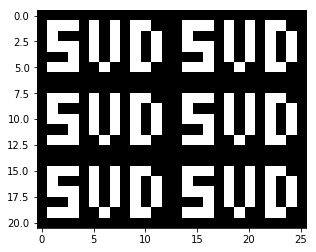

In [8]:
plt.imshow(I, interpolation='nearest', cmap='gray')
plt.show()

&#9989; <font color=red>**Question a:**</font> Find the rank of this matrix $I$ (the grayscale image).

In [9]:
#####Start your code here #####
sym.Matrix(I).rank()
#####End of your code here#####

&#9989; <font color=red>**Question b:**</font> Find an approximation of the image with only the first 3 singular values.

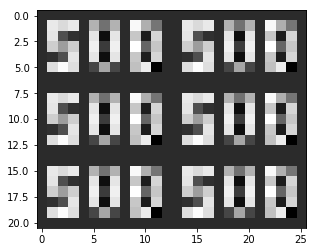

In [10]:
#####Start your code here #####
U, e, Vt = np.linalg.svd(I)
S = np.zeros(I.shape)
S[:len(e), :len(e)] = np.diag(e)
s = e[:3] #first 3 singular values

U1 = np.matrix(U[:,:len(s)])
S1 = np.diag(s)
Vt1 = np.matrix(Vt[:len(s),:])

I3 = U1*S1*Vt1

plt.imshow(I3, interpolation='nearest', cmap='gray')
plt.show()
#####End of your code here#####

Since this grayscale image can be represented as a low-rank matrix. We can use the singular value decomposition to remove random noise that corrupts the image. 

The following code adds Gaussian noise onto the image. It is not easy to read all the characters in this noisy image.

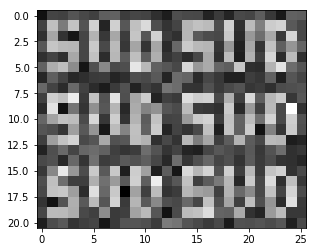

In [11]:
In = I + 0.2* np.random.randn(I.shape[0],I.shape[1])
plt.imshow(In, interpolation='nearest', cmap='gray')
plt.show()

&#9989; <font color=red>**Question c:**</font> Plot the singular values of this noisy image.

Text(0, 0.5, 'singular value')

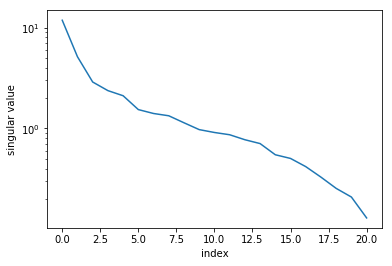

In [12]:
#####Start your code here #####

Un, en, Vtn = np.linalg.svd(In)

plt.plot(en)
plt.gca().set_yscale('log')
plt.xlabel('index')
plt.ylabel('singular value')
#####End of your code here#####

We think the main signal is contained in large singular values and the noise is in small singular values. So we would like to keep only the largest singular values. 
From the previous tasks, we know that we can approximate the original image with only 5 singular values. 
Let's keep the first 5 singular values, and see the results.

&#9989; <font color=red>**Question d:**</font> Find an approximation of the noisy image with only the first 5 singular values. You should be able to read all the characters clearly now.

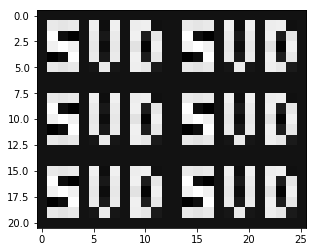

In [13]:
#####Start your code here #####
s = en[:5] #first 5 singular values

U1n = np.matrix(U[:,:len(s)])
S1n = np.diag(s)
Vt1n = np.matrix(Vt[:len(s),:])

I5 = U1n*S1n*Vt1n

plt.imshow(I5, interpolation='nearest', cmap='gray')
plt.show()

#####End of your code here#####

----

# Question 3 - Furniture Company Profit

<img src="http://i2.cdn.turner.com/cnn/dam/assets/131216104851-made-in-usa-itsy-bitsy-ritzy-horizontal-gallery.png" width="80%">

An industrial furniture company manufactures desks, cabinet, and chairs. 
These items involve metal and wood. 
The required amounts for each material and the profit is listed below. 
That is, one desk cost 3 Metal and 4 Wood and its profit is \$16.


|    | Metal           |    Wood        |       Profit   | 
|----|-----------------|----------------|----------|
|Cabinet| 6 | 1 |  \$12 |
|Chair | 1 | 2 |  \$6|
|Desk|               3 |              4 |      \$16|


The following are linear equations representing the metal and wood consumption of the company in terms of the number of cabinet  ($Ca$), the number of Chair ($Ch$), and the number of desks ($D$). 

$$metal =  6 *Ca + 1* Ch+  3* D$$
$$wood = 1* Ca + 2 *Ch+ 4*D$$

&#9989; <font color=red>**Question a:**</font> The above system of equations can be formed as $Ax=b$ by defining $A$. Creat a ```numpy``` matrix for $A$. 

In [14]:
#####Start your code here #####
A = np.matrix([[6,1,3],[1,2,4]])
sym.Matrix(A)
#####End of your code here#####

⎡6  1  3⎤
⎢       ⎥
⎣1  2  4⎦

&#9989; <font color=red>**Question b:**</font> Describe the elementary row operation that will convert the first element of the second row of $A$ to zero (i.e., the first step in calculating the reduced row echelon form that makes $A_{21} = 0$):

R2 = -1/6R1 + R2

&#9989; <font color=red>**Question c:**</font> Calculate the null space of the matrix $A$.

In [15]:
#####Start your code here #####
sym.Matrix(A).rref()[0]
# null(A) = D*(-2/11,-21/11, 1)^T
sym.Matrix(A).nullspace()
#####End of your code here#####

⎡⎡-2/11⎤⎤
⎢⎢     ⎥⎥
⎢⎢-21  ⎥⎥
⎢⎢──── ⎥⎥
⎢⎢ 11  ⎥⎥
⎢⎢     ⎥⎥
⎣⎣  1  ⎦⎦

&#9989; <font color=red>**Question d:**</font> This month, the company can use 450 metal and 250 wood. 
What are the possible numbers of desks, cabinets, and chairs to make?

In [16]:
#####Start your code here #####

sym.Matrix([[6,1,3,450],[1,2,4,250]]).rref()[0]
#####End of your code here#####

⎡            650 ⎤
⎢1  0  2/11  ─── ⎥
⎢             11 ⎥
⎢                ⎥
⎢       21   1050⎥
⎢0  1   ──   ────⎥
⎣       11    11 ⎦

$$
\left[
\begin{matrix}
    Ca \\
    Ch \\
    D
 \end{matrix}
\right] =
\left[
\begin{matrix}
    -2/11 \\
    -21/11 \\
    1
 \end{matrix}
\right]D+ 
\left[
\begin{matrix}
    650/11 \\
    1050/11 \\
    0
 \end{matrix}
\right]
$$

&#9989; <font color=red>**Question e:**</font> If you are the manager of this company, what are the number of desks, cabinet, and chairs you will make to make the most profit? What is your profit?

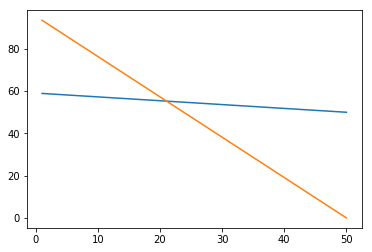

In [17]:
#####Start your code here #####

D = np.linspace(1,50)
#y = 12*(-2/11*x+650/11) + 6*(-21/11*x+1050/11) + 16*x
Ca = -2/11*D+650/11
Ch = -21/11*D+1050/11
plt.plot(D,Ca)
plt.plot(D,Ch)
plt.show()
#####End of your code here#####

In [18]:
# Remove chairs since it diminshes the quickest with an increase in desks - the most profitble 
A2 = np.matrix([[6,3,450],[1,4,250]])
p2 = sym.Matrix(A2).rref()
print(p2)
print("profit ca and d", p2[0][2]*12+p2[0][5]*16)

A3 = np.matrix([[6,1,450],[1,2,250]])
p3 = sym.Matrix(A3).rref()
print(p3)
print("profit ca and ch", p2[0][2]*12+p2[0][5]*6)

A2 = np.matrix([[1,3,450],[2,4,250]])
p2 = sym.Matrix(A2).rref()
print(p2)
print("profit ch and d", p2[0][2]*6+p2[0][5]*16)

(Matrix([
[1, 0, 50],
[0, 1, 50]]), (0, 1))
profit ca and d 1400
(Matrix([
[1, 0,  650/11],
[0, 1, 1050/11]]), (0, 1))
profit ca and ch 900
(Matrix([
[1, 0, -525],
[0, 1,  325]]), (0, 1))
profit ch and d 2050


## To maximize - 50 cabinets and 50 desks, yielding a profit of $1400 

----
# Question 4 - (25 points) Quick Questions


<font color=red>**Question a.1 (1 points):**</font> The set of $2\times 2$ matrices where all the elements are nonnegative is a vector space? (True or False)

False

<font color=red>**Question a.2 (2 points):**</font> Can the following vectors span $R^3$? Why?
$$(1,-2,3),\quad (-2,4,-6),\quad (0,6,4)$$

In [19]:
b1 = [1,-2,3]
b2 = [-2,4,-6]
b3 = [0,6,4]
b = np.matrix([b1,b2,b3])
sym.Matrix(b).rref()
# no linear dependent

⎛⎡1  0  13/3⎤        ⎞
⎜⎢          ⎥        ⎟
⎜⎢0  1  2/3 ⎥, (0, 1)⎟
⎜⎢          ⎥        ⎟
⎝⎣0  0   0  ⎦        ⎠

<font color=red>**Question a.3 (1 points):**</font> $\{(1,0,1),(2,1,5)\}$ is a basis for the subspace of vector in $R^3$ of the form $(a,b,a+3b)$? (True or False)

True

<font color=red>**Question a.4 (1 points):**</font> Let $V$ be a vector space of dimension $n$. A set of more than $n$ vectors can span $V$, but cannot be linearly dependent? (True or False)

True

<font color=red>**Question b.1 (3 points):**</font> Verify that $\{x^2+1,x+2,x-3\}$ is basis for the $P_2$ (the set of all polynomials with degree not great than 2). 

In [20]:
b1 = [1,0,1]
b2 = [0,1,2]
b3 = [0,1,-3]
b = np.matrix([b1,b2,b3])
sym.Matrix(b).rref()

⎛⎡1  0  0⎤           ⎞
⎜⎢       ⎥           ⎟
⎜⎢0  1  0⎥, (0, 1, 2)⎟
⎜⎢       ⎥           ⎟
⎝⎣0  0  1⎦           ⎠

<font color=red>**Question b.2 (2 points):**</font> Find the coordinate vector of $3x^2+2x-13$ relative to the basis $\{x^2+1,x+2,x-3\}$

In [21]:
B = np.matrix([[1,0,1],[0,1,2],[0,1,-3]]).T
P = np.linalg.inv(B)

u = np.matrix([3,2,-13]).T

UB = P*u
sym.Matrix(UB)

⎡3.0 ⎤
⎢    ⎥
⎢-2.0⎥
⎢    ⎥
⎣4.0 ⎦

<font color=red>**Question c.1 (2 points):**</font> Find the projection of the vector $v$ onto the vector $u$ for 
$$v=(1,3)\qquad u=(2,3)$$

In [22]:
v = np.array([1,3])
u = np.array([2,3])
np.dot(v,u)/np.dot(u,u)*u

array([1.69230769, 2.53846154])

<font color=red>**Question c.2 (3 points):**</font> Find the distance of $(1,2,-4)$ in $R^3$ to the subspace of vectors in the form of $(a, 3a, b)$.

In [23]:
x = np.array([1,2,-4])
b1 = np.array([1,3,0])
b2 = np.array([0,0,1])
y = x - (np.dot(x,b1)/np.dot(b1,b1)*b1 + np.dot(x,b2)/np.dot(b2,b2)*b2)
np.linalg.norm(y)

<font color=red>**Question d:**</font> Let 
$$T=\begin{bmatrix}6&4 & 2\\ 3&2 & 1\end{bmatrix}.$$

<font color=red>**Question d.1 (3 points):**</font> Find the kernel and range of the matrix $T$.

In [24]:
sym.Matrix([[6,4,2],[3,2,1]]).T.rref()

⎛⎡1  1/2⎤      ⎞
⎜⎢      ⎥      ⎟
⎜⎢0   0 ⎥, (0,)⎟
⎜⎢      ⎥      ⎟
⎝⎣0   0 ⎦      ⎠

$$range = 
\left[
\begin{matrix}
    1 \\
    1/2
 \end{matrix}
\right]
$$

In [25]:
sym.Matrix([[6,4,2],[3,2,1]]).nullspace()

⎡⎡-2/3⎤  ⎡-1/3⎤⎤
⎢⎢    ⎥  ⎢    ⎥⎥
⎢⎢ 1  ⎥, ⎢ 0  ⎥⎥
⎢⎢    ⎥  ⎢    ⎥⎥
⎣⎣ 0  ⎦  ⎣ 1  ⎦⎦

<font color=red>**Question d.2 (2 points):**</font> Verify that 
$$\mbox{dim Ker}(T) + \mbox{dim range}(T) = \mbox{dim domain}(T)$$

In [26]:
1 + 2 == 3

True

<font color=red>**Question e.1 (3 points):**</font> Consider $v=(1,3,-1)$ in $R^3$. Let $W$ be the subspace consisting of all vectors in the form $(a,b,a-2b)$. Decompose $v$ into the sum of a vector in $W$ and a vector orthogonal to $W$.

In [27]:
b1 = np.array([1,0,1])
b2 = np.array([0,1,-2])
v = np.array([1,3,-1])

W = np.dot(v,b1)/np.dot(b1,b1)*b1 + np.dot(v,b2)/np.dot(b2,b2)*b2

WT = v - W
print("vector in W", W)
print("vector in orthoginal to W", WT)

vector in W [ 0.  1. -2.]
vector in orthoginal to W [1. 2. 1.]


<font color=red>**Question e.2 (2 points):**</font> Find a basis for the vector space of upper triangular $2\times 2$ matrix.

$$\left[
\begin{matrix}
    1 & 0\\
    0 & 0
 \end{matrix}
\right],
\left[
\begin{matrix}
    0 & 1\\
    0 & 0
 \end{matrix}
\right],
\left[
\begin{matrix}
    0 & 0\\
    0 & 1
 \end{matrix}
\right]
$$



---------
### Congratulations, you're almost done with your EXAM

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for today's dropbox (Don't forget to add your names in the first cell and restart and check the notebook for errors).

&#9989; <font color=red>**DO THIS:**</font>
- In the "Kernel" menu above, select "Restart and Run All". Make sure your answers still match what you expect. This will ensure you didn't do anything out of order by mistake.
- Download the Notebook to your desktop with the filename using the format **"<NETID\>_Exam2.ipynb"**.  Replace <NETID\> in the filename with your personal MSU NetID (the stuff that comes before the @ symbol in your msu email address).
- Upload the newly renamed notebook to the D2L dropbox. 

&#169; Copyright 2018,  Michigan State University Board of Trustees